In [260]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.options import Options

import requests
import pandas as pd
from datetime import datetime, timedelta


In [134]:
stock = 'AMD'
Api_key = 'KQ6OMU8QUYEDLUZF'
window = 14

In [114]:
def Alpha_vantage(params):
    url = 'https://www.alphavantage.co/query'
    response = requests.get(url,params=params)
    data = response.json()
    return(data)
    

In [222]:
ts = TimeSeries(key=Api_key,output_format='pandas')
ti = TechIndicators(key=Api_key, output_format='pandas')
data,metadata = ts.get_daily_adjusted(stock,outputsize = 'full')
df = pd.DataFrame(data)

In [224]:
df.index = pd.to_datetime(df.index)


In [230]:
df = df.sort_index()
df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Returns,High-Low,volatility,SMA
date,,,,,,,,,,,,
1999-11-01,19.94,20.44,19.880,20.31,10.155,1563700.0,0.0,1.0,NaN,NaN,NaN,NaN
1999-11-02,20.31,20.81,20.310,20.56,10.280,1898100.0,0.0,1.0,1.012309,0.125,NaN,NaN
1999-11-03,20.69,21.50,20.560,21.31,10.655,2236000.0,0.0,1.0,1.036479,0.375,NaN,NaN
1999-11-04,21.13,21.31,19.940,20.63,10.315,2415000.0,0.0,1.0,0.968090,-0.340,NaN,NaN
1999-11-05,20.75,21.38,20.250,21.25,10.625,2148000.0,0.0,1.0,1.030053,0.310,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,122.16,139.14,121.825,134.82,134.820,76089361.0,0.0,1.0,1.017509,2.320,9.274015,144.437143
2024-08-06,135.15,136.44,129.100,130.18,130.180,64455613.0,0.0,1.0,0.965584,-4.640,8.924747,142.347857
2024-08-07,133.75,136.24,128.370,128.67,128.670,54676492.0,0.0,1.0,0.988401,-1.510,8.726337,140.412143


In [228]:
df['Returns'] = df['5. adjusted close']/df['5. adjusted close'].shift(1)
df['High-Low'] = df['5. adjusted close'] - df['5. adjusted close'].shift(1)
df['volatility'] = df['5. adjusted close'].rolling(window=window).std()
df['SMA'] = df['5. adjusted close'].rolling(window=window).mean()


<Axes: xlabel='date'>

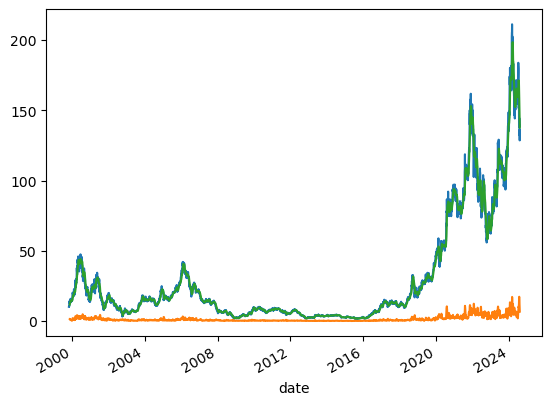

In [232]:
df['5. adjusted close'].plot()
df['volatility'].plot()
df['SMA'].plot()

In [166]:
bollinger_bands, _ = ti.get_bbands(symbol=stock, time_period=window, series_type='close')
atr_data, _ = ti.get_atr(symbol=stock, time_period=window)

In [200]:
combined_data = atr_data.join(bollinger_bands[['Real Upper Band', 'Real Middle Band', 'Real Lower Band']])
combined_data

,ATR,Real Upper Band,Real Middle Band,Real Lower Band
date,,,,
2024-08-09,8.1962,150.6932,137.7793,124.8653
2024-08-08,8.5282,155.0459,139.3221,123.5984
2024-08-07,8.5835,157.2300,140.4121,123.5943
2024-08-06,8.6384,159.5481,142.3479,125.1477
2024-08-05,8.7382,162.3105,144.4371,126.5638
...,...,...,...,...
1999-11-26,0.8133,15.0408,12.8618,10.6828
1999-11-24,0.8228,15.0171,12.6318,10.2465
1999-11-23,0.8403,14.9872,12.3954,9.8035


In [234]:
combined_data = df.join(bollinger_bands[['Real Upper Band', 'Real Middle Band', 'Real Lower Band']])
combined_data = combined_data.join(atr_data['ATR'])

In [296]:
combined_data.drop(['High-Low','1. open','2. high','3. low','4. close','7. dividend amount','8. split coefficient'],axis=1,inplace=True)

In [298]:
combined_data.dropna(inplace=True)
combined_data.to_csv(stock+'.csv',index=False)

In [284]:
url = f'https://www.alphavantage.co/query?function=HISTORICAL_OPTIONS&symbol={stock}&apikey={Api_key}'
response = requests.get(url)
data = response.json()
for x in pd.DataFrame(data).iloc[-1]:
    print(x)

Historical Options
success
{'contractID': 'AMD261218P00390000', 'symbol': 'AMD', 'expiration': '2026-12-18', 'strike': '390.00', 'type': 'put', 'last': '0.00', 'mark': '255.50', 'bid': '253.00', 'bid_size': '2', 'ask': '258.00', 'ask_size': '2', 'volume': '0', 'open_interest': '0', 'date': '2024-08-09', 'implied_volatility': '0.99039', 'delta': '-0.44346', 'gamma': '0.00193', 'theta': '-0.00305', 'vega': '0.81443', 'rho': '-7.43163'}
